# SUJET B : Modes de vibration d'un tambour

In [1]:
#import des librairy utiles
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mtl
from scipy import linalg as la

#consante utiles
sqrt3 = np.sqrt(3)

## Discretisation de la peau de tambour

In [2]:
#premiere fonction intermediaire
def points_hex_axe(i, j, alpha):
    return i*alpha, j*alpha*sqrt3

#seconde fonction intermediaire
def points_hex_hors_axe(i, j, alpha):
    return (2*i + 1)*alpha/2, (2*j + 1)*alpha*sqrt3/2

#fonction qui reuni les deux fonction intermediaire
def points_hex(i, j, alpha):
    x_axe, y_axe = points_hex_axe(i, j, alpha)
    x_hors_axe, y_hors_axe = points_hex_hors_axe(i, j, alpha)
    
    return np.array([np.append(x_axe, x_hors_axe), np.append(y_axe, y_hors_axe)]).T

#fonction pour crée un cadrillage de point
def quadrillage(i_min, i_max, j_min, j_max):
    i = np.arange(i_min, i_max + 1)
    j = np.arange(j_min, j_max + 1)
    
    i, j = np.meshgrid(i, j)
    return i.flatten(), j.flatten()

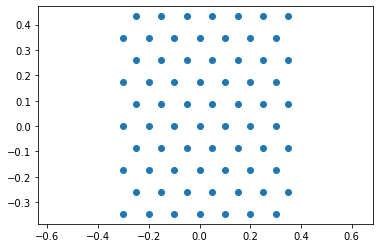

In [3]:
i, j = quadrillage(-3, 3, -2, 2)
xy = points_hex(i, j, 0.1)

plt.scatter(xy[:, 0], xy[:, 1])
plt.axis('equal')
plt.show()

On peut voir que chaque point du graph a bien 6 plus proches voisins

In [4]:
def Tambour_circulaire(r, alpha):
    #valeurs maximals de i et j
    i_range = (2*r/alpha)//2 + 1
    j_range = (2*r/alpha/sqrt3)//2 + 1
    
    #quadrillage
    i, j = quadrillage(-i_range, i_range, -j_range, j_range)
    
    #ensemble de points
    xy_inter = points_hex(i, j, alpha)
    xy_final = []
    
    for xy in xy_inter:
        if xy[0]*xy[0] + xy[1]*xy[1] <= r:
            xy_final.append(xy)
            
    return np.array(xy_final)

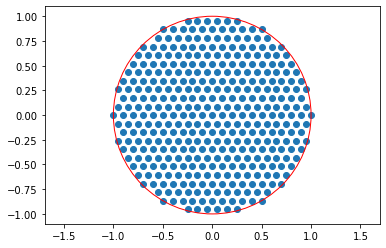

In [5]:
xy = Tambour_circulaire(1, 0.1)

fig, ax = plt.subplots()
plt.axis('equal')

ax.scatter(xy[:, 0], xy[:, 1])
ax.add_patch(plt.Circle((0, 0), 1, color='r', fill=False))

plt.show()

La fonction $Tambour\_circulaire(r, \alpha)$ genere d'abord un pavage hexadonale de dimmension carré qui inclue le cercle de rayon $r$ puis selectione ensuite les couple de point dans le cercle de rayon $r$.

On peut voir que cette fonction donne bien le resultat attendu.

## Equation du mouvement et mise en oeuvre des elements finis

3) Cette equation vient d'un PFD appliqué sur le point $l$ dont les voisin sont les points $l \in \left[0... 6\right]$. On a dans cette equation une force de rappel $F_{k,l} = C\left(z_k - z_l\right) $, d'où le terme $6z_l$ puisque chaque voisin vient ajouter un terme $z_l$ au PFD.

Le coefficient C est alors une constante de raideur (en $N.m^{-1}$) qui cherche à rendre la toile du tamboure horizontal.

4) On a alors $\ddot{z_l} = - \omega^2 \beta_l e^{- i \omega t}$ et $\sum_{k=1}^{6} z_k - 6z_l = \left( \sum_{k=1}^{6} \beta_k - 6 \beta_l \right) e^{- i \omega t} $, et on obtient en factorisant dans l'equation precedente par $e^{- i \omega t}$ et en prenant $\rho$ et $C$ unitaire :

$$ \sum_{k=1}^{6} \beta_k - 6 eta_l = -\omega^2 \beta_l $$

Ce qui peut s'ecrire sous forme matriciel avec $Z$ le vecteur $Z_i = \beta_i$ et A la matrice dont les element non nuls sont :

$$ A_{kl} = \begin{cases}
    6/dS & \textrm{si k = l} \\
    -1/dS & \textrm{si k et l sont voisin} \\
    0 & \textrm{sinon}
\end{cases} $$

On remarque que $A$ est symetrique réel car si $k$ est voisin de $l$, alors $l$ est voisin de $k$. On peut bien prendre cette forme de matrice même au bords, car la condition aux limites nul permette de rajouter dans les sommes les points voisin des points au bords meme si il ne sont pas dans le vecteur $Z$.

In [6]:
def matriceA(x, y, alpha):
    #creation de la matrice A de diagonal 6
    n = len(x)
    A = 6*np.eye(n)
    
    #constants utiles
    dS = sqrt3 * alpha * alpha / 2
    r_comp = 1.51*alpha
    r_comp2 = r_comp * r_comp
    
    for i in range(n):
        for j in range(i):
            Dx = x[i] - x[j]
            Dy = y[i] - y[j]
            
            #equivalentt car seuls les plus proches voisin peuvent avoir une distance inferieurs à 1.51 alpha
            if Dx*Dx + Dy*Dy <= r_comp2:
                A[i, j] = -1
                A[j, i] = -1
    
    return A / dS

In [7]:
alpha = 0.08

xy = Tambour_circulaire(1, alpha)
x, y = xy[:, 0], xy[:, 1]

A = matriceA(x, y, alpha)
eig_val, eig_vect = la.eigh(A)
f = np.sqrt(eig_val)/(2*np.pi)

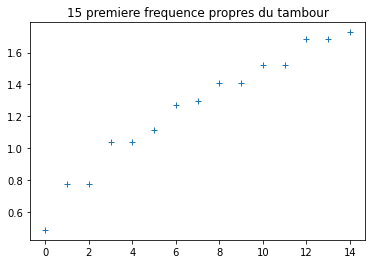

In [8]:
plt.plot(f[:15], "+")
plt.title("15 premiere frequence propres du tambour")
plt.show()

On remarque que les 15 premieres frequences propre croit de maniere quasi-linéaire.

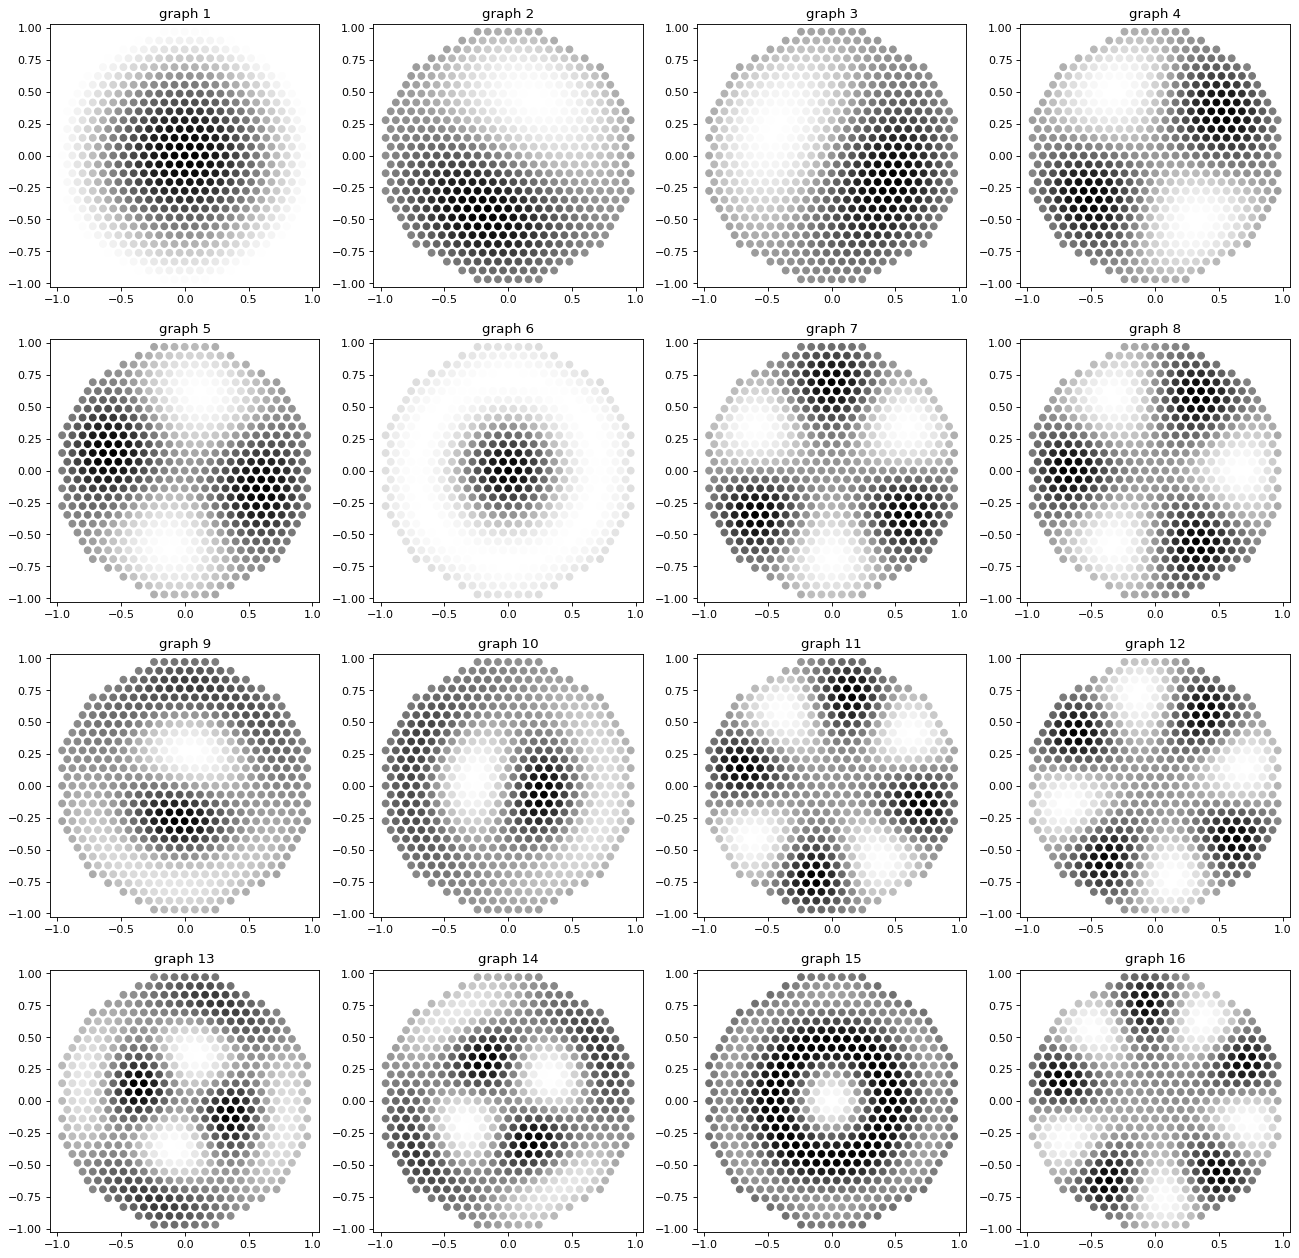

In [9]:
plt.figure(figsize=(20, 20), dpi=80)

for i in range(4):
    for j in range(4):
        n = 4*i + j + 1
        plt.subplot(4, 4, n)
        plt.axis('equal')
        plt.scatter(x, y, c=eig_vect[:, n - 1], cmap="Greys")
        plt.title(f"graph {n}")
        
plt.show()

8) On remarque donc les correspondance entre les modes propre de la figure 1 et nos modes propres:
- (a) correspond au graph 1
- (b) correspond aux graphs 4 et 5
- (c) correspond au graph 6
- (d) correspond aux graphs 13 et 14
- (e) correspond aux graphs 9 et 10
- (f) correspond aux graphs 7 et 8

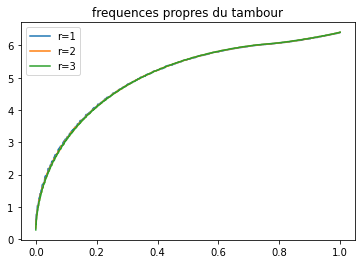

In [10]:
xy = Tambour_circulaire(2, alpha)
x, y = xy[:, 0], xy[:, 1]

A = matriceA(x, y, alpha)
eig_val_2 = la.eigvalsh(A)
f_2 = np.sqrt(eig_val_2)/(2*np.pi)

xy = Tambour_circulaire(3, alpha)
x, y = xy[:, 0], xy[:, 1]

A = matriceA(x, y, alpha)
eig_val_3 = la.eigvalsh(A)
f_3 = np.sqrt(eig_val_3)/(2*np.pi)

plt.plot(np.linspace(0, 1, len(f)), f, label="r=1")
plt.plot(np.linspace(0, 1, len(f_2)), f_2, label="r=2")
plt.plot(np.linspace(0, 1, len(f_3)), f_3, label="r=3")
plt.title("frequences propres du tambour")
plt.legend()
plt.show()

9) On remarques que la taille du tambour (à alpha constant) n'a pas d'impact sur les frequence propre (en pensant à normalisé l'axe des absice).

In [11]:
def Tambour_elliptique(a, b, alpha):
    #valeurs maximals de i et j
    i_range = (a/alpha)//2 + 1
    j_range = (b/alpha/sqrt3)//2 + 1
    
    #quadrillage
    i, j = quadrillage(-i_range, i_range, -j_range, j_range)
    
    #ensemble de points
    xy_inter = points_hex(i, j, alpha)
    xy_final = []
    
    for xy in xy_inter:
        if xy[0]*xy[0]/(a*a)*4 + xy[1]*xy[1]/(b*b)*4 <= 1:
            xy_final.append(xy)
            
    return np.array(xy_final)

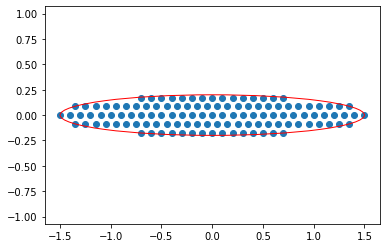

In [12]:
xy = Tambour_elliptique(3, 0.4, 0.1)

fig, ax = plt.subplots()
plt.axis("equal")

ax.add_patch(mtl.patches.Ellipse((0, 0), 3, 0.4, color='r', fill=False))
ax.scatter(xy[:, 0], xy[:, 1])

plt.show()

In [13]:
xy = Tambour_elliptique(3, 0.4, 0.05)
x, y = xy[:, 0], xy[:, 1]

A = matriceA(x, y, 0.05)
eig_val_e = la.eigvalsh(A)
f_e = np.sqrt(eig_val_e)/(2*np.pi)

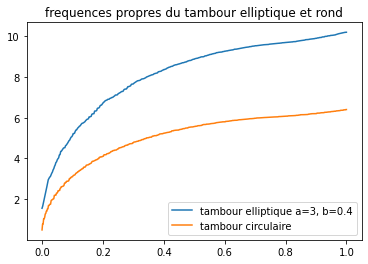

In [14]:
plt.plot(np.linspace(0, 1, len(f_e)), f_e, label="tambour elliptique a=3, b=0.4")
plt.plot(np.linspace(0, 1, len(f)), f, label="tambour circulaire")
plt.title("frequences propres du tambour elliptique et rond")
plt.legend()
plt.show()

11) On remarque que le tambour elliptique a des frequences propre beaucoup plus haute, et evoluant differement.

## Tambour iso-spectrayx : peux-on entendre la forme d'un tabour

In [15]:
def check_duplicate(xy, alpha):
    r_comp = alpha * 0.5
    r_comp2 = r_comp * r_comp
    
    duplicates = []
    for i in range(len(xy)):
        if i not in duplicates:
            for j in range(i + 1, len(xy)):
                Dx = xy[i, 0] - xy[j, 0]
                Dy = xy[i, 1] - xy[j, 1]

                if Dx*Dx + Dy*Dy < r_comp2:
                    duplicates.append(j)

    return np.delete(xy, duplicates, 0)

La fonction $check\_duplicate(xy, alpha)$ elimine les points qui sont plus proche que $\alpha/2$.

In [16]:
def carre(x0, y0, l, alpha):
    i_range = np.ceil(l/alpha) + 2
    j_range = np.ceil(l/alpha/sqrt3) + 2

    i, j = quadrillage(-1, i_range, -1, j_range)
    xy_inter = points_hex(i, j, 0.1)
    xy_final = []
    
    for xy in xy_inter:
        if l >= xy[0] >= 0 and l >= xy[1] >= 0:
            xy_final.append(xy)
    
    xy_final = np.array(xy_final)
    xy_final[:, 0] += x0
    xy_final[:, 1] += y0
    
    return xy_final

def triangle_haut_gauche(x0, y0, l, alpha):
    xy_inter = carre(x0 + l, y0 - l, l, alpha)
    xy_final = []
    
    for xy in xy_inter:
        if xy[1] - (y0 - l) >= xy[0] - (x0 + l):
            xy_final.append(xy)
    
    return np.array(xy_final)

def triangle_bas_droite(x0, y0, l, alpha):
    xy_inter = carre(x0, y0, l, alpha)
    xy_final = []
    
    for xy in xy_inter:
        if xy[1] - y0 <= xy[0] - x0:
            xy_final.append(xy)
    
    return np.array(xy_final)

def triangle_bas_gauche(x0, y0, l, alpha):
    xy_inter = carre(x0 + l, y0, l, alpha)
    xy_final = []
    
    for xy in xy_inter:
        if xy[1] - y0 <= l - (xy[0] - (x0 + l)):
            xy_final.append(xy)
    
    return np.array(xy_final)

def triangle_haut_droite(x0, y0, l, alpha):
    xy_inter = carre(x0, y0 - l, l, alpha)
    xy_final = []
    
    for xy in xy_inter:
        if xy[1] - (y0 - l) >= l - (xy[0] - x0):
            xy_final.append(xy)
    
    return np.array(xy_final)

Apres avoir defini des fonctions pavant une chaque triangle, on peut maintenant ecrire les fonctions $Tambour\_cocotte(l, alpha)$ et $Tambour\_fleche(l, alpha)$.

In [17]:
def Tambour_cocotte(l, alpha):
    xy = triangle_bas_droite(l, 0, l, alpha)
    xy = np.concatenate((xy, triangle_haut_gauche(0, l, l, alpha)), 0)
    xy = np.concatenate((xy, triangle_haut_droite(0, l, l, alpha)), 0)
    xy = np.concatenate((xy, triangle_bas_gauche(0, l, l, alpha)), 0)
    xy = np.concatenate((xy, triangle_haut_droite(l, 2*l, l, alpha)), 0)
    xy = np.concatenate((xy, triangle_bas_droite(l, 2*l, l, alpha)), 0)
    xy = np.concatenate((xy, triangle_bas_gauche(l, 2*l, l, alpha)), 0)
    
    return check_duplicate(xy, alpha)

def Tambour_fleche(l, alpha):
    xy = triangle_bas_gauche(0, 0, l, alpha)
    xy = np.concatenate((xy, triangle_haut_gauche(0, 0, l, alpha)), 0)
    xy = np.concatenate((xy, triangle_bas_droite(0, 0, l, alpha)), 0)
    xy = np.concatenate((xy, triangle_haut_droite(l, l, l, alpha)), 0)
    xy = np.concatenate((xy, triangle_haut_gauche(l, l, l, alpha)), 0)
    xy = np.concatenate((xy, triangle_bas_gauche(l, l, l, alpha)), 0)
    xy = np.concatenate((xy, triangle_haut_droite(2*l, 2*l, l, alpha)), 0)
    
    return check_duplicate(xy, alpha)

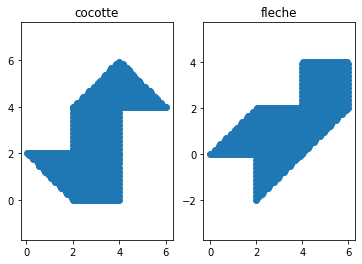

In [18]:
plt.subplot(1, 2, 1)
xy = Tambour_cocotte(2, 0.1)
plt.scatter(xy[:, 0], xy[:, 1])

plt.title("cocotte")
plt.axis("equal")

plt.subplot(1, 2, 2)
xy = Tambour_fleche(2, 0.1)
plt.scatter(xy[:, 0], xy[:, 1])

plt.title("fleche")
plt.axis("equal")

plt.show()

13) Nos deux fonction marche donc bien.

In [19]:
xy = Tambour_cocotte(1, alpha)
x_c, y_c = xy[:, 0], xy[:, 1]

A = matriceA(x_c, y_c, alpha)
eig_val_c, eig_vec_c = la.eigh(A)
f_c = np.sqrt(eig_val_c)/(2*np.pi)

xy = Tambour_fleche(1, alpha)
x_f, y_f = xy[:, 0], xy[:, 1]

A = matriceA(x_f, y_f, alpha)
eig_val_f, eig_vec_f = la.eigh(A)
f_f = np.sqrt(eig_val_f)/(2*np.pi)

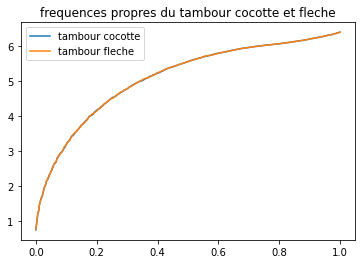

In [20]:
plt.plot(np.linspace(0, 1, len(f_c)), f_c, label="tambour cocotte")
plt.plot(np.linspace(0, 1, len(f_f)), f_f, label="tambour fleche")
plt.title("frequences propres du tambour cocotte et fleche")
plt.legend()
plt.show()

14) Les spectres de ces deux tambour sont bien identiques

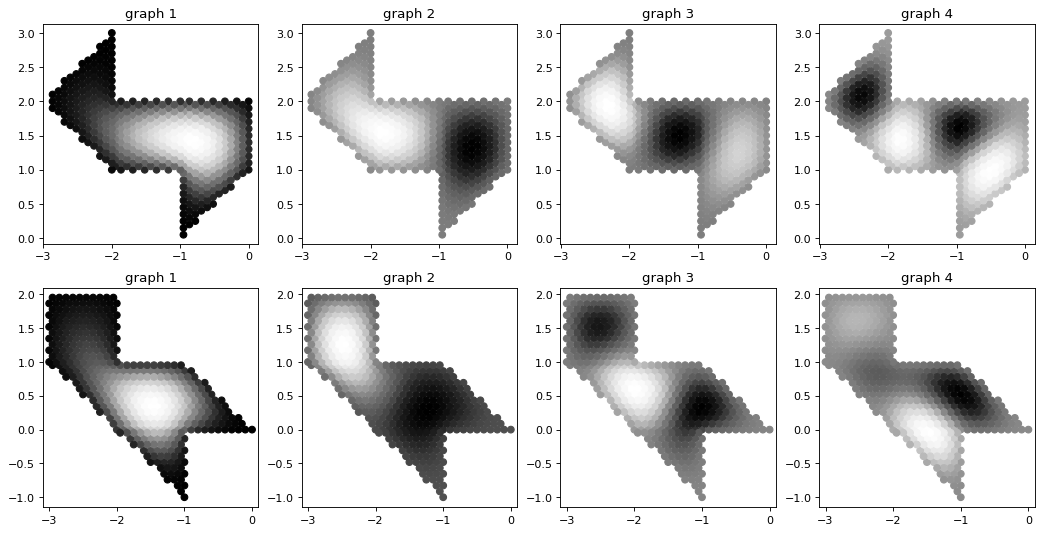

In [21]:
plt.figure(figsize=(2*8, 8), dpi=80)

for j in range(4):
    plt.subplot(2, 4, j + 1)
    plt.axis('equal')
    plt.scatter(-y_c, x_c, c=eig_vec_c[:, j], cmap="Greys")
    plt.title(f"graph {j + 1}")

for j in range(4):
    plt.subplot(2, 4, j + 5)
    plt.axis('equal')
    plt.scatter(-x_f, y_f, c=eig_vec_f[:, j], cmap="Greys")
    plt.title(f"graph {j + 1}")
        
plt.show()

15) One reconnait les meme mode propre que ceux presentés dans la figure 5.